# Imports

In [3]:
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import gensim.downloader
import copy
import warnings
#warnings.filterwarnings('ignore') #comment out to see warnings
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from nltk.tokenize import word_tokenize

# Load File

In [4]:
f = gzip.open('goemotions.json.gz','rb') # Open .gz zip file
jsonFile = f.read()
y = json.loads(jsonFile)  # Store all contents into an array
y = np.array(y) # Convert array to np array

# Generate Pie Charts

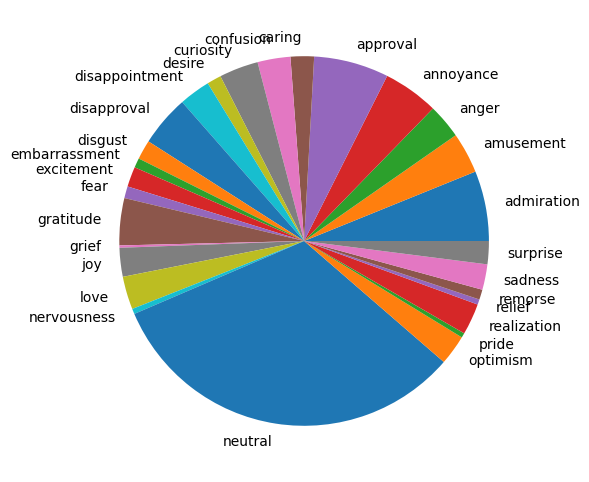

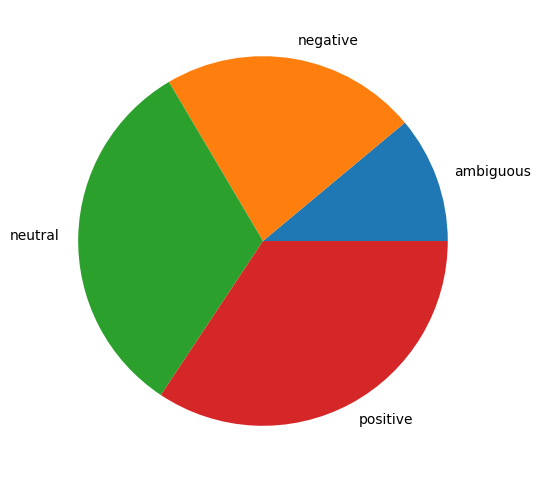

In [5]:
# Extract the 2nd and 3rd columns (emotions and sentiments)
emotions = y[:,1] 
sentiments = y[:,2]

# Count the total number of each emotion/sentiment
eValues, eCounts = np.unique(emotions, return_counts=True)
sValues, sCounts = np.unique(sentiments, return_counts=True)

efig = plt.figure(figsize=(6, 6))
plt.pie(eCounts, labels = eValues)
plt.show() 
efig.savefig('emotions.png', dpi=efig.dpi)
sfig = plt.figure(figsize=(6, 6))
plt.pie(sCounts, labels = sValues)
plt.show() 
sfig.savefig('sentiments.png', dpi=sfig.dpi)

# Process Dataset

In [6]:
corpus = y[:,0]
#Transform corpus to word count sparse matrix
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus)
#Print the number of words
print(len(vectorizer.get_feature_names_out())) 

30449


# Split Dataset

In [7]:
#Split the dataset and the emotions/sentiments into train and test with seed 1
corpus_nonvector_train, corpus_nonvector_test, corpus_train, corpus_test, emotions_train, emotions_test, sentiments_train, sentiments_test = train_test_split(corpus, x, emotions, sentiments, test_size=0.2, random_state=1)

# Base-MNB

In [8]:
#Create and train model
classifierMNBemotions = MultinomialNB()
modelMNBemotions = classifierMNBemotions.fit(corpus_train, emotions_train)
predictMNBemotions = modelMNBemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMNBemotions = confusion_matrix(emotions_test, predictMNBemotions)
print(classification_report(emotions_test, predictMNBemotions, zero_division=0))

#Write everything to file
f = open("Base_MNB_emotions.txt", "w")
f.write("Base Multinomial Naive Bayes for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixMNBemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictMNBemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.47      0.43      0.45      2126
     amusement       0.52      0.29      0.37      1212
         anger       0.46      0.13      0.20      1126
     annoyance       0.19      0.07      0.10      1686
      approval       0.23      0.08      0.12      2304
        caring       0.29      0.05      0.09       672
     confusion       0.35      0.05      0.09      1010
     curiosity       0.41      0.11      0.17      1113
        desire       0.33      0.05      0.09       380
disappointment       0.28      0.04      0.07       907
   disapproval       0.26      0.08      0.12      1523
       disgust       0.42      0.08      0.14       568
 embarrassment       0.57      0.01      0.03       312
    excitement       0.38      0.05      0.09       595
          fear       0.43      0.03      0.05       350
     gratitude       0.74      0.67      0.70      1404
         grief       0.00      0.00      0.00  

In [7]:
#Create and train model
classifierMNBsentiments = MultinomialNB()
modelMNBsentiments = classifierMNBsentiments.fit(corpus_train, sentiments_train)
predictMNBsentiments = modelMNBsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMNBsentiments = confusion_matrix(sentiments_test, predictMNBsentiments)
print(classification_report(sentiments_test, predictMNBsentiments, zero_division=0))

#Write everything to file
f = open("Base_MNB_sentiments.txt", "w")
f.write("Base Multinomial Naive Bayes for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixMNBsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictMNBsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.42      0.23      0.30      3792
    negative       0.53      0.52      0.52      7752
     neutral       0.49      0.49      0.49     11075
    positive       0.61      0.70      0.65     11745

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364



# Top-MNB

In [9]:
#Create and train model
classifierTopMNBemotions = MultinomialNB()
TMNBE = GridSearchCV(estimator=classifierTopMNBemotions, param_grid={'alpha': [0, 0.1, 0.5, 1]}, verbose=1)
TMNBE.fit(corpus_train, emotions_train)
print(TMNBE.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


{'alpha': 0.5}


In [10]:
#Create confusion matrix and print metrics report
predictTopMNBemotions = TMNBE.predict(corpus_test)
confusionMatrixTopMNBemotions = confusion_matrix(emotions_test, predictTopMNBemotions)
print(classification_report(emotions_test, predictTopMNBemotions, zero_division=0))

#Write everything to file
f = open("Top_MNB_emotions.txt", "w")
f.write("Top Multinomial Naive Bayes (using GridSearch) for emotions with variable alpha \n")
f.write(np.array2string(confusionMatrixTopMNBemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictTopMNBemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.45      0.50      0.48      2126
     amusement       0.51      0.45      0.48      1212
         anger       0.39      0.20      0.26      1126
     annoyance       0.19      0.11      0.14      1686
      approval       0.22      0.12      0.15      2304
        caring       0.26      0.15      0.19       672
     confusion       0.30      0.12      0.17      1010
     curiosity       0.32      0.18      0.23      1113
        desire       0.33      0.14      0.19       380
disappointment       0.19      0.07      0.10       907
   disapproval       0.20      0.12      0.15      1523
       disgust       0.35      0.15      0.21       568
 embarrassment       0.48      0.07      0.12       312
    excitement       0.24      0.08      0.12       595
          fear       0.30      0.09      0.14       350
     gratitude       0.70      0.74      0.72      1404
         grief       0.00      0.00      0.00  

In [11]:
#Create and train model
classifierTopMNBsentiments = MultinomialNB()
TMNBS = GridSearchCV(estimator=classifierTopMNBsentiments, param_grid={'alpha': [0, 0.1, 0.5, 1]}, verbose=1)
TMNBS.fit(corpus_train, sentiments_train)
print(TMNBS.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\RobinLB\miniconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


{'alpha': 1}


In [12]:
#Create confusion matrix and print metrics report
predictTopMNBsentiments = TMNBS.predict(corpus_test)
confusionMatrixTopMNBsentiments = confusion_matrix(sentiments_test, predictTopMNBsentiments)
print(classification_report(sentiments_test, predictTopMNBsentiments, zero_division=0))

#Write everything to file
f = open("Top_MNB_sentiments.txt", "w")
f.write("Top Multinomial Naive Bayes (using GridSearch) for sentiments with variable alpha \n")
f.write(np.array2string(confusionMatrixTopMNBsentiments))
f.write("\n")
f.write(classification_report(emotions_test, predictTopMNBsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.42      0.23      0.30      3792
    negative       0.53      0.52      0.52      7752
     neutral       0.49      0.49      0.49     11075
    positive       0.61      0.70      0.65     11745

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364



# Base-DT

In [13]:
classifierDTemotions = tree.DecisionTreeClassifier() 
modelDTemotions = classifierDTemotions.fit(corpus_train, emotions_train)
predictDTemotions = modelDTemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTemotions = confusion_matrix(emotions_test, predictDTemotions)
print(classification_report(emotions_test, predictDTemotions, zero_division=0))

#Write everything to file
f = open("Base_DT_emotions.txt", "w")
f.write("Base Decision Tree for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictDTemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.40      0.54      0.46      2126
     amusement       0.41      0.57      0.48      1212
         anger       0.26      0.37      0.30      1126
     annoyance       0.15      0.22      0.18      1686
      approval       0.19      0.26      0.22      2304
        caring       0.20      0.25      0.22       672
     confusion       0.26      0.30      0.28      1010
     curiosity       0.32      0.36      0.34      1113
        desire       0.20      0.27      0.23       380
disappointment       0.15      0.17      0.16       907
   disapproval       0.23      0.24      0.23      1523
       disgust       0.23      0.20      0.21       568
 embarrassment       0.22      0.18      0.20       312
    excitement       0.22      0.20      0.21       595
          fear       0.36      0.35      0.36       350
     gratitude       0.75      0.73      0.74      1404
         grief       0.17      0.15      0.16  

In [14]:
#Create and train model
classifierDTsentiments = tree.DecisionTreeClassifier()
modelDTsentiments = classifierDTsentiments.fit(corpus_train, sentiments_train)
predictDTsentiments = modelDTsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTsentiments = confusion_matrix(sentiments_test, predictDTsentiments)
print(classification_report(sentiments_test, predictDTsentiments, zero_division=0))

#Write everything to file
f = open("Base_DT_sentiments.txt", "w")
f.write("Base Decision Tree for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictDTsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.35      0.47      0.40      3792
    negative       0.50      0.60      0.55      7752
     neutral       0.51      0.47      0.49     11075
    positive       0.70      0.59      0.64     11745

    accuracy                           0.54     34364
   macro avg       0.51      0.53      0.52     34364
weighted avg       0.55      0.54      0.54     34364



# Top-DT

In [ ]:
parametersDT = {'criterion':('entropy', 'gini'), 'max_depth':[40, 120], 'min_samples_split':[40, 80, 120]}
classifierDTemotions = GridSearchCV(tree.DecisionTreeClassifier(), parametersDT) 

modelDTemotions = classifierDTemotions.fit(corpus_train, emotions_train)
predictDTemotions = modelDTemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTemotions = confusion_matrix(emotions_test, predictDTemotions)
print(classification_report(emotions_test, predictDTemotions, zero_division=0))

#Write everything to file
f = open("Top_DT_emotions.txt", "w")
f.write("Top Decision Tree for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictDTemotions, zero_division=0))
f.close()

In [ ]:
parametersDT = {'criterion':('entropy', 'gini'), 'max_depth':[40, 120], 'min_samples_split':[40, 80, 120]}
classifierDTsentiments = GridSearchCV(tree.DecisionTreeClassifier(), parametersDT) 

modelDTsentiments = classifierDTsentiments.fit(corpus_train, sentiments_train)
predictDTsentiments = modelDTsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTsentiments = confusion_matrix(sentiments_test, predictDTsentiments)
print(classification_report(sentiments_test, predictDTsentiments, zero_division=0))

#Write everything to file
f = open("Top_DT_sentiments.txt", "w")
f.write("Top Decision Tree for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictDTsentiments, zero_division=0))
f.close()

# Base-MLP

In [ ]:
#Create and train model
classifierMLPemotions = MLPClassifier()
modelMLPemotions = classifierMLPemotions.fit(corpus_train, emotions_train)
predictMLPemotions = modelMLPemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMLPemotions = confusion_matrix(emotions_test, predictMLPemotions)
print(classification_report(emotions_test, predictMLPemotions, zero_division=0))

#Write everything to file
f = open("Base_MLP_emotions.txt", "w")
f.write("Base Multi-Layered Perceptron for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixMLPemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictMLPemotions, zero_division=0))
f.close()

In [ ]:
#Create and train model
classifierMLPsentiments = MLPClassifier()
modelMLPsentiments = classifierMLPsentiments.fit(corpus_train, sentiments_train)
predictMLPsentiments = modelMLPsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMLPsentiments = confusion_matrix(sentiments_test, predictMLPsentiments)
print(classification_report(sentiments_test, predictMLPsentiments, zero_division=0))

#Write everything to file
f = open("Base_MLP_sentiments.txt", "w")
f.write("Base Multi-Layered Perceptron for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixMLPsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictMLPsentiments, zero_division=0))
f.close()

# Top-MLP

In [ ]:
parametersMLP = {
    'activation': ('sigmoid', 'tanh', 'relu', 'identity'),
    'hidden_layer_sizes': ((30, 50,), (10,10,10,)),
    'solver': ('adam', 'sgd')
}

In [ ]:
topMLPemotions = GridSearchCV(MLPClassifier(), parametersMLP)
topMLPemotions.fit(corpus_train, emotions_train)
predictTopMLPemotions = topMLPemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixTopMLPemotions = confusion_matrix(emotions_test, predictTopMLPemotions)
print(classification_report(emotions_test, predictTopMLPemotions, zero_division=0))

#Write everything to file
f = open("Top_MLP_emotions.txt", "w")
f.write("Top Multi-Layered Perceptron for emotions with ... \n") #include hyper-parameters in string
f.write(np.array2string(confusionMatrixTopMLPemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictTopMLPemotions, zero_division=0))
f.close()

In [ ]:
topMLPsentiments = GridSearchCV(MLPClassifier(), parametersMLP)
topMLPsentiments.fit(corpus_train, sentiments_train)
predictTopMLPsentiments = topMLPsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixTopMLPsentiments = confusion_matrix(sentiments_test, predictTopMLPsentiments)
print(classification_report(sentiments_test, predictTopMLPsentiments, zero_division=0))

#Write everything to file
f = open("Top_MLP_sentiments.txt", "w")
f.write("Top Multi-Layered Perceptron for sentiments with ... \n")  #include hyper-parameters in string
f.write(np.array2string(confusionMatrixTopMLPsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictDTsentiments, zero_division=0))
f.close()

# Embeddings

In [ ]:
#Load the pre-trained model
embeddings = gensim.downloader.load("word2vec-google-news-300")

# Tokenize

In [ ]:
#Tokenize every word of the training set and store it into an array
trainTokens = [""]*len(corpus_nonvector_train)
for i in range(len(corpus_nonvector_train)):
    trainTokens[i]=word_tokenize(corpus_nonvector_train[i])
    
#Tokenize every word of the test set and store it into an array
testTokens = [""]*len(corpus_nonvector_test)
for i in range(len(corpus_nonvector_test)):
    testTokens[i]=word_tokenize(corpus_nonvector_test[i])

In [ ]:
#Print the number of tokens overall
traintokencount=0
for i in range(len(trainTokens)):
    traintokencount+=len(trainTokens[i])
testtokencount=0
for i in range(len(testTokens)):
    testtokencount+=len(testTokens[i])
print(traintokencount+testtokencount)

# Embedding of each post - Hits and Misses

In [ ]:
#Loop through the test and training set counting misses
trainmissesCount = 0
for i in range(len(trainTokens)):
    for j in range(len(trainTokens[i])):
        if(not embeddings.__contains__(trainTokens[i][j])):
            trainmissesCount+=1
print("%d hits and %d misses - %2.2f%% hit-rate for the training set" % (traintokencount-trainmissesCount, trainmissesCount, (1-trainmissesCount/traintokencount)*100))

testmissesCount=0
for i in range(len(testTokens)):
    for j in range(len(testTokens[i])):
        if(not embeddings.__contains__(testTokens[i][j])):
            testmissesCount+=1
print("%d hits and %d misses - %2.2f%% hit-rate for the test set" % (testtokencount-testmissesCount, testmissesCount, (1-testmissesCount/testtokencount)*100))
print("%d hits and %d misses - %2.2f%% hit-rate overall" % (traintokencount-trainmissesCount+testtokencount-testmissesCount, trainmissesCount+testmissesCount, (1-((trainmissesCount+testmissesCount)/(traintokencount+testtokencount)))*100))

# Embedding of each post

In [ ]:
#Define embedding function - loops through a 2D array and converts it to embedding
def embed(arr):
    embeddedArr = []    
    for i in range(len(arr)):
        embeddedArr.append([])
        for j in range(len(arr[i])):
            if(embeddings.__contains__(arr[i][j])):
                embeddedArr[i].append(embeddings[arr[i][j]])
    return embeddedArr

#Embed the tokens of the training set
embeddedPostsTrain = []
embeddedPostsTrain = embed(trainTokens)

#Embed the tokens of the test set
embeddedPostsTest = []
embeddedPostsTest = embed(testTokens)

In [ ]:
#Clean up the embedded vectors (Remove sentences with no words appearing in the model) as well as the corresponding entries in the y vectors
#Copy all of the y vectors
embedEmotionsTrain = copy.deepcopy(emotions_train)
embedEmotionsTest = copy.deepcopy(emotions_test)
embedSentimentsTrain = copy.deepcopy(sentiments_train)
embedSentimentsTest = copy.deepcopy(sentiments_test)

#Loop through the Training vectors, deleting the entries corresponding to empty embeds
i=0
while(i<len(embeddedPostsTrain)):
    if(not embeddedPostsTrain[i]):
        embeddedPostsTrain = np.delete(embeddedPostsTrain, i)
        embedEmotionsTrain = np.delete(embedEmotionsTrain, i)
        embedSentimentsTrain = np.delete(embedSentimentsTrain, i)
    else:
        i+=1

#Repeat for the test Sets
i=0
while(i<len(embeddedPostsTest)):
    if(not embeddedPostsTest[i]):
        embeddedPostsTest = np.delete(embeddedPostsTest, i)
        embedEmotionsTest = np.delete(embedEmotionsTest, i)
        embedSentimentsTest = np.delete(embedSentimentsTest, i)
    else:
        i+=1

# Compute average embedding

In [ ]:
#Average the embeddings for the test set
embeddedTrain = []
for i in range(len(embeddedPostsTrain)):
    embeddedTrain.append(sum(embeddedPostsTrain[i])/len(embeddedPostsTrain[i]))
    
#Average the embeddings for the test set
embeddedTest = []
for i in range(len(embeddedPostsTest)):
    embeddedTest.append(sum(embeddedPostsTest[i])/len(embeddedPostsTest[i]))